# 01 - Exploração e Limpeza de Dados
Autora: Fernanda Baptista de Siqueira  
Curso: MBA em Tecnologia para Negócios – AI, Data Science e Big Data  
Tema: Análise de Acidentes de Trânsito em Porto Alegre (2020–2024)  
Origem DataFrame: Equipe Armazém de Dados de Mobilidade - EAMOB/CIET  
https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes (11/05/2025)  


---

### 1. Importação e Configuração
Carrega arquivo de configuração


In [1]:
from config import *


In [ ]:
"""
try: 
    from config import *
    
except ImportError:

    # Manipulação e Análise
    import pandas as pd
    import numpy as np

    # Visualização
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Salvar dataframes
    import os
    import warnings

    # Configurações visuais
    plt.style.use("seaborn-v0_8")
    sns.set_theme(palette="deep", style="whitegrid")
    pd.set_option('display.max_columns', None)
    warnings.filterwarnings("ignore", category=FutureWarning)

"""


### 2. Leitura e Schema Inicial
1) Carrega o arquivo `acidentes.csv`


In [2]:
caminho_dados = '../dados/primarios/acidentes.csv'

try:
    df = pd.read_csv(
        caminho_dados,
        sep=';',
        encoding='utf-8',
        low_memory=False,
        dtype=str
        )
    print(f"CSV original lido com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo '{caminho_dados}' não encontrado. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

CSV original lido com sucesso!


2) Entende e inspeciona DataFrame

In [3]:
resumo_df(df)
checar_nulos(df)

Dimensões: (69521, 34)

Tipos de dados:
data_extracao    object
predial1         object
queda_arr        object
data             object
feridos          object
feridos_gr       object
mortes           object
morte_post       object
fatais           object
auto             object
taxi             object
lotacao          object
onibus_urb       object
onibus_met       object
onibus_int       object
caminhao         object
moto             object
carroca          object
bicicleta        object
outro            object
cont_vit         object
ups              object
patinete         object
idacidente       object
longitude        object
latitude         object
log1             object
log2             object
tipo_acid        object
dia_sem          object
hora             object
noite_dia        object
regiao           object
consorcio        object
dtype: object

Nulos por coluna:
data_extracao        0
predial1          4079
queda_arr            0
data                 0
feridos            

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2025-06-01 01:33:13,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0,0,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2025-06-01 01:33:13,598,0.0,2020-01-01 00:00:00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,5,0,669089,NaN,NaN,AV BENTO GONCALVES,NaN,ABALROAMENTO,QUARTA-FEIRA,03:00:00.0000000,NOITE,LESTE,NaN
2,2025-06-01 01:33:13,1271,0.0,2020-01-01 00:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,669097,NaN,NaN,AV INDEPENDENCIA,NaN,ATROPELAMENTO,QUARTA-FEIRA,23:00:00.0000000,NOITE,LESTE,NaN
3,2025-06-01 01:33:13,1901,0.0,2020-01-02 00:00:00,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,669098,NaN,NaN,AV EDUARDO PRADO,NaN,ATROPELAMENTO,QUINTA-FEIRA,00:05:00.0000000,NOITE,SUL,NaN
4,2025-06-01 01:33:13,3302,0.0,2020-01-02 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,669099,-51.21153485762743,-30.081535213015123,AV TERESOPOLIS,NaN,ABALROAMENTO,QUINTA-FEIRA,09:00:00.0000000,DIA,SUL,NaN


consorcio       96.83
log2            72.42
latitude        14.82
longitude       14.82
predial1         5.87
hora             0.80
log1             0.07
data_extracao    0.00
queda_arr        0.00
data             0.00
taxi             0.00
lotacao          0.00
feridos          0.00
feridos_gr       0.00
mortes           0.00
morte_post       0.00
fatais           0.00
auto             0.00
carroca          0.00
moto             0.00
caminhao         0.00
onibus_int       0.00
onibus_met       0.00
onibus_urb       0.00
bicicleta        0.00
outro            0.00
patinete         0.00
idacidente       0.00
cont_vit         0.00
ups              0.00
dia_sem          0.00
tipo_acid        0.00
noite_dia        0.00
regiao           0.00
dtype: float64

In [ ]:
"""
# Lista as cinco primeira linhas
print("\nCinco primeiras linhas:")
display(df.head())

# Mostra o número de linhas e colunas
print("\nDimensões do Dataset (linhas, colunas)")
print(df.shape)

# Mostra tipo de dados, valores não nulos
print("\nInformações gerais do DataFrame:")
df.info() 

# Conta valores ausentes por coluna
print("\nContagem de Valores Ausentes por Coluna")
print(df.isnull().sum())

"""



Cinco primeiras linhas:


,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,taxi,lotacao,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,cont_vit,ups,patinete,idacidente,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2025-06-01 01:33:13,0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,1,5,0,190816,0,0,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2025-06-01 01:33:13,598,0.0,2020-01-01 00:00:00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,5,0,669089,NaN,NaN,AV BENTO GONCALVES,NaN,ABALROAMENTO,QUARTA-FEIRA,03:00:00.0000000,NOITE,LESTE,NaN
2,2025-06-01 01:33:13,1271,0.0,2020-01-01 00:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,5,0,669097,NaN,NaN,AV INDEPENDENCIA,NaN,ATROPELAMENTO,QUARTA-FEIRA,23:00:00.0000000,NOITE,LESTE,NaN
3,2025-06-01 01:33:13,1901,0.0,2020-01-02 00:00:00,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,5,0,669098,NaN,NaN,AV EDUARDO PRADO,NaN,ATROPELAMENTO,QUINTA-FEIRA,00:05:00.0000000,NOITE,SUL,NaN
4,2025-06-01 01:33:13,3302,0.0,2020-01-02 00:00:00,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,5,0,669099,-51.21153485762743,-30.081535213015123,AV TERESOPOLIS,NaN,ABALROAMENTO,QUINTA-FEIRA,09:00:00.0000000,DIA,SUL,NaN



Dimensões do Dataset (linhas, colunas)
(69521, 34)

Informações gerais do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69521 entries, 0 to 69520
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_extracao  69521 non-null  object
 1   predial1       65442 non-null  object
 2   queda_arr      69521 non-null  object
 3   data           69521 non-null  object
 4   feridos        69521 non-null  object
 5   feridos_gr     69521 non-null  object
 6   mortes         69521 non-null  object
 7   morte_post     69521 non-null  object
 8   fatais         69521 non-null  object
 9   auto           69521 non-null  object
 10  taxi           69521 non-null  object
 11  lotacao        69521 non-null  object
 12  onibus_urb     69521 non-null  object
 13  onibus_met     69521 non-null  object
 14  onibus_int     69521 non-null  object
 15  caminhao       69521 non-null  object
 16  moto           69521 non-n

3) Limpa nomes colunas; remove 'data_extracao', 'consorcio', 'latitude' e 'longitude'

In [4]:
# Remove espaços em branco no início/fim dos nomes, deixa no estilo Snake das colunas (boa prática)
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Remove colunas não utilizadas
df = df.drop(columns=['data_extracao', 'consorcio'], errors='ignore')

# Lista nome de colunas
print(df.columns)

Index(['predial1', 'queda_arr', 'data', 'feridos', 'feridos_gr', 'mortes',
       'morte_post', 'fatais', 'auto', 'taxi', 'lotacao', 'onibus_urb',
       'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta',
       'outro', 'cont_vit', 'ups', 'patinete', 'idacidente', 'longitude',
       'latitude', 'log1', 'log2', 'tipo_acid', 'dia_sem', 'hora', 'noite_dia',
       'regiao'],
      dtype='object')


## 3. Tratamento
1) Transforma tipos; remove inválidos

In [5]:
# Converte 'data' para datetime
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Remove inválidos 'data', 'hora', 'log1', 'regiao'
df = df.dropna(subset=['data', 'hora', 'log1', 'regiao'])

# Remove data fora do escopo (2020-2025)
df = df[(df['data'] >= '2020-01-01') & (df['data'] <= '2025-04-01')]
print("Datas fora do escopo (2020-2025) removidas com sucesso.")

# Remove chaves duplicadas
df = df.drop_duplicates(subset='idacidente')

# Transforma colunas tipos de colunas em Categoria
col_cat = ['regiao', 'tipo_acid', 'dia_sem', 'noite_dia']
df[col_cat] = df[col_cat].astype('category')

# Transforma colunas tipos de colunas Inteiro
col_int = [c for c in [
  'queda_arr', 'feridos', 'feridos_gr', 'mortes',
  'morte_post', 'fatais', 'auto', 'taxi', 'lotacao', 'onibus_urb',
  'onibus_met', 'onibus_int', 'caminhao', 'moto', 'carroca', 'bicicleta',
  'outro', 'cont_vit', 'ups', 'patinete', 'idacidente', 'predial1'
  ] if c in df.columns]
for c in col_int:
    df[c] = pd.to_numeric(df[c], errors='coerce').astype('Int32')

# Transforma colunas tipos de colunas em Float
col_float = ['longitude', 'latitude']    
df[col_float] = df[col_float].apply(pd.to_numeric, errors='coerce').astype('float32')

# Transforma colunas tipos de colunas em String
col_str = ['log1', 'log2']
df[col_str] = df[col_str].astype('string')

# Transforma coluna 'hora' para timedelta
df['hora'] = pd.to_timedelta(df['hora'], errors='coerce')

# Padroniza nomes dos dias da semana
df["dia_sem"] = (
    df["dia_sem"]
    .str.title()                            # Deixa só a primeira letra maiúscula
    .str.replace("-Feira", "", regex=False) # Remove o sufixo "-Feira"
)
     
print("\nInformações após:")
df.info()
df.describe(include='all')
print(df.head())

Datas fora do escopo (2020-2025) removidas com sucesso.

Informações após:
<class 'pandas.core.frame.DataFrame'>
Index: 68837 entries, 0 to 69520
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   predial1    64799 non-null  Int32          
 1   queda_arr   68837 non-null  Int32          
 2   data        68837 non-null  datetime64[ns] 
 3   feridos     68837 non-null  Int32          
 4   feridos_gr  68837 non-null  Int32          
 5   mortes      68837 non-null  Int32          
 6   morte_post  68837 non-null  Int32          
 7   fatais      68837 non-null  Int32          
 8   auto        68837 non-null  Int32          
 9   taxi        68837 non-null  Int32          
 10  lotacao     68837 non-null  Int32          
 11  onibus_urb  68837 non-null  Int32          
 12  onibus_met  68837 non-null  Int32          
 13  onibus_int  68837 non-null  Int32          
 14  caminhao    68837 non-null  Int3

2) Cria novas variáveis e DataFrames necessários

In [6]:
# Cria coluna 'hora_int'
df['hora_int'] = df['hora'].dt.components['hours']

# Cria coluna 'data_hora'
df['data_hora'] = df['data']+ df['hora']

# Cria df_20_24 (teste) e df_2025 (validacao)
df_20_24 = df[(df["data"].dt.year >= 2020) & (df["data"].dt.year <= 2024)].copy()
df_2025 = df[(df['data'].dt.year == 2025)].copy()

# Cria coluna 'soma_veiculos'
cols_veiculos = ["auto", "moto", "onibus_urb", "caminhao",
             "bicicleta", "onibus_met", "onibus_int", "taxi"]

df['soma_veiculos'] = df[cols_veiculos].sum(axis=1)

# Cria coluna total de vítimas
df_20_24["total_vitimas"] = (
    df_20_24["feridos"].fillna(0) +
    df_20_24["fatais"].fillna(0)
)


3) Salva DataFrames tratatos

In [7]:
# Salva dataframes tratado
salvar_parquet(df, "../dados/intermediarios/acidentes_tratado.parquet")
salvar_parquet(df_20_24, "../dados/intermediarios/df_20_24.parquet")
salvar_parquet(df_2025, "../dados/intermediarios/df_2025.parquet")

✅ DataFrame salvo em ../dados/intermediarios/acidentes_tratado.parquet
✅ DataFrame salvo em ../dados/intermediarios/df_20_24.parquet
✅ DataFrame salvo em ../dados/intermediarios/df_2025.parquet


## 4) Análise Exploratória Inicial


1) Temporal

NameError: name 'plt' is not defined

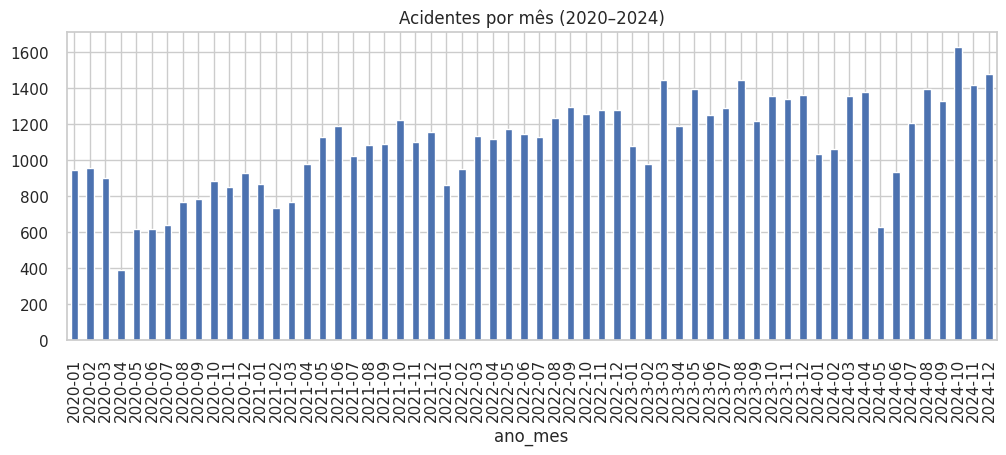

In [23]:
# Distribuição por ano e mês
df_20_24["ano_mes"] = df_20_24["data"].dt.to_period("M")
ax = df_20_24["ano_mes"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
ax.set_title("Acidentes por mês (2020–2024)")
plt.show()

# Distribuição por ano
df_20_24["ano"] = df_20_24["data"].dt.to_period("Y")
ax = df_20_24["ano"].value_counts().sort_index().plot(kind="bar", figsize=(12,4))
ax.set_title("Acidentes por ano (2020–2024)")
plt.show()

# Dias da semana
dias_ordenados = ["Domingo", "Segunda", "Terça", "Quarta",
                   "Quinta", "Sexta", "Sábado"]
sns.countplot(x="dia_sem", data=df_20_24,
              order=dias_ordenados)
plt.title("Acidentes por dia da semana")
plt.show()

# Horário do dia
sns.countplot(x="hora_int", data=df, order=range(24))
plt.title("Distribuição de acidentes por hora do dia")
plt.xlabel("Hora do dia")
plt.show()



2) Tipos de acidentes
* Do total de registros, 3,2% não possuem tipo de acidente cadastrado. Estes casos foram excluídos das análises de distribuição por tipo de acidente, por não representarem categoria válida.

In [12]:
# Top 10 tipos de acidente
df_plot = (
    df_20_24["tipo_acid"]
    .replace("NAO CADASTRADO", np.nan)   # trata como missing
    .dropna()                            # remove para visualização
)

df_plot.value_counts().head(10).iloc[::-1].plot(kind="barh", figsize=(8,5))
plt.title("Top 10 tipos de acidente")
plt.show()


# Veículos mais envolvidos
df_20_24[cols_veiculos].sum().sort_values().plot(kind="barh")
plt.title("Total dos principais veículos envolvidos")
plt.show()


# Cria coluna com total de vítimas (feridos + fatais)
df_20_24["total_vitimas"] = (
    df_20_24["feridos"].fillna(0) +
    df_20_24["fatais"].fillna(0)
)

# Agrupa por tipo de acidente e soma vítimas
acidentes_vitimas = (
    df_20_24.groupby("tipo_acid")["total_vitimas"]
    .sum()
    .sort_values(ascending=False)
)

# Exibe top 10 tipos de acidente com mais vítimas
print(acidentes_vitimas.head(10))

# Plot
acidentes_vitimas.head(10).plot(
    kind="barh", figsize=(8,5)
)
plt.title("Tipos de acidente com maior número de vítimas (2020–2024)")
plt.xlabel("Total de vítimas")
plt.ylabel("Tipo de acidente")
plt.gca().invert_yaxis()  # deixa o maior no topo
plt.show()

NameError: name 'df_20_24' is not defined

3) Severidade

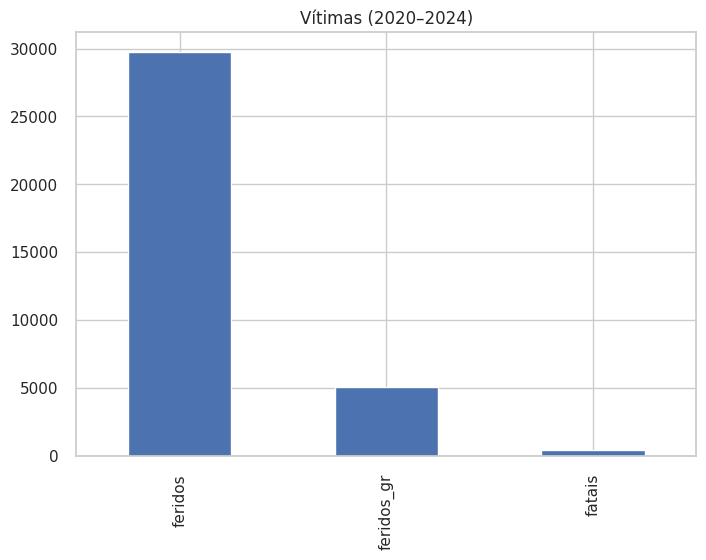

      veiculo  total_vitimas
0        auto          23579
1        moto          18503
2   bicicleta           1323
3  onibus_urb           1148
4    caminhao            941
5  onibus_int            249
6  onibus_met            212
7        taxi            159
tipo_acid
ATROPELAMENTO     118
CHOQUE            101
ABALROAMENTO       94
QUEDA              29
COLISÃO            26
CAPOTAGEM           6
TOMBAMENTO          2
NAO CADASTRADO      1
EVENTUAL            0
INCÊNDIO            0
Name: fatais, dtype: Int32


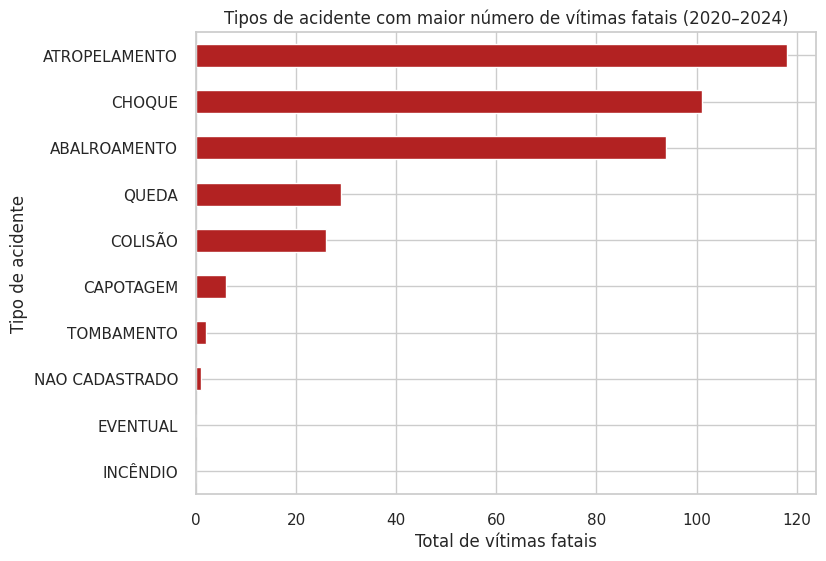

      veiculo  total_fatais
0        auto           217
1        moto           193
2    caminhao            39
3   bicicleta            18
4  onibus_urb            17
5  onibus_met             5
6  onibus_int             3
7        taxi             2


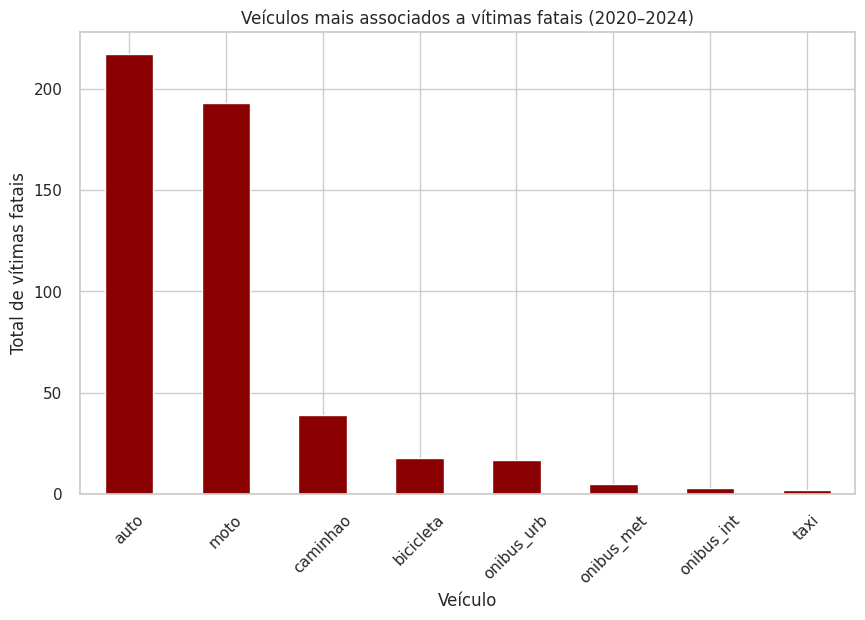

      veiculo  fatais_por_acidente
0  onibus_met                 0.01
1   bicicleta                 0.01
2        moto                 0.01
3  onibus_urb                 0.01
4    caminhao                 0.01
5  onibus_int                 0.01
6        auto                 0.00
7        taxi                 0.00


In [11]:
# Distribuição de severidade (feridos, graves, fatais)
df_20_24[["feridos","feridos_gr","fatais"]].sum().plot(kind="bar")
plt.title("Vítimas (2020–2024)")
plt.show()


# Para cada veículo, soma o total de vítimas nos acidentes em que ele aparece
veiculos_vitimas = {}
for col in cols_veiculos:
    veiculos_vitimas[col] = df_20_24.loc[df_20_24[col] > 0, "total_vitimas"].sum()

# Transforma em DataFrame ordenado
df_veic_vitimas = (
    pd.Series(veiculos_vitimas)
    .sort_values(ascending=False)
    .rename("total_vitimas")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)
print(df_veic_vitimas)


# Agrupa por tipo de acidente
acidentes_fatais = (
    df_20_24.groupby("tipo_acid")["fatais"]
    .sum()
    .sort_values(ascending=False)
)
print(acidentes_fatais.head(10))

# Plot
acidentes_fatais.head(10).plot(
    kind="barh", figsize=(8,6), color="firebrick"
)
plt.title("Tipos de acidente com maior número de vítimas fatais (2020–2024)")
plt.xlabel("Total de vítimas fatais")
plt.ylabel("Tipo de acidente")
plt.gca().invert_yaxis()
plt.show()


# Cria total de fatais
df_20_24["total_fatais"] = df_20_24["fatais"].fillna(0)

# Calcula total de fatais por veículo
veiculos_fatais = {}
for veic in cols_veiculos:
    veiculos_fatais[veic] = df_20_24.loc[df_20_24[veic] > 0, "total_fatais"].sum()

df_veic_fatais = (
    pd.Series(veiculos_fatais)
    .sort_values(ascending=False)
    .rename("total_fatais")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

print(df_veic_fatais.head(10))

# Plot
df_veic_fatais.plot(
    x="veiculo", y="total_fatais",
    kind="bar", figsize=(10,6), color="darkred", legend=False
)
plt.title("Veículos mais associados a vítimas fatais (2020–2024)")
plt.xlabel("Veículo")
plt.ylabel("Total de vítimas fatais")
plt.xticks(rotation=45)
plt.show()


taxa_fatais = {}
for veic in cols_veiculos:
    total_acidentes = (df_20_24[veic] > 0).sum()
    total_fatais = df_20_24.loc[df_20_24[veic] > 0, "total_fatais"].sum()
    
    if total_acidentes > 0:
        taxa_fatais[veic] = total_fatais / total_acidentes
    else:
        taxa_fatais[veic] = 0

df_taxa_fatais = (
    pd.Series(taxa_fatais)
    .sort_values(ascending=False)
    .rename("fatais_por_acidente")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

print(df_taxa_fatais)


4. Espacial

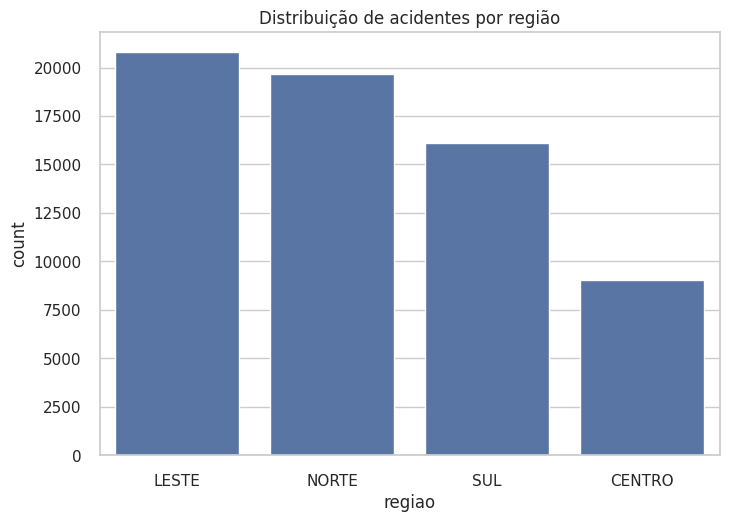

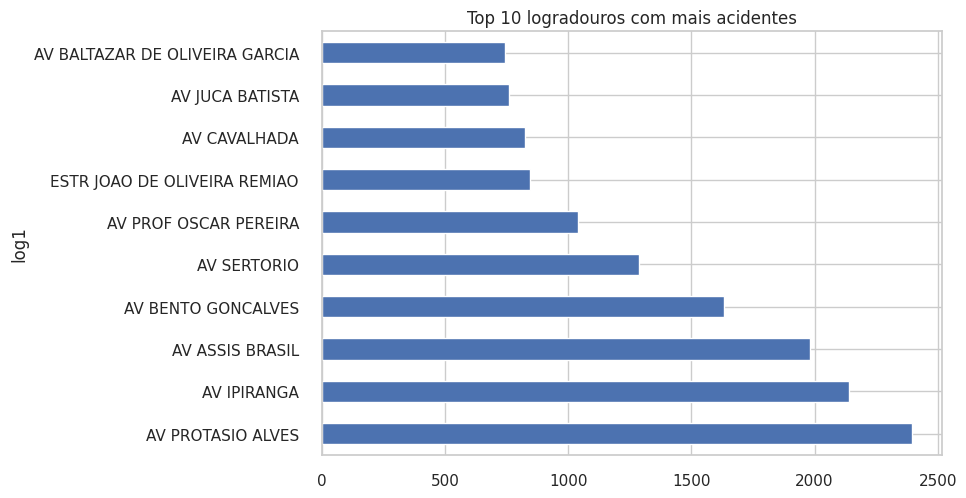

In [22]:
# Acidentes por região
sns.countplot(x="regiao", data=df_20_24,
              order=df_20_24["regiao"].value_counts().index)
plt.title("Distribuição de acidentes por região")
plt.show()

# Hotspots por logradouro
df_20_24["log1"].value_counts().head(10).plot(kind="barh")
plt.title("Top 10 logradouros com mais acidentes")
plt.show()


5. Condições externas

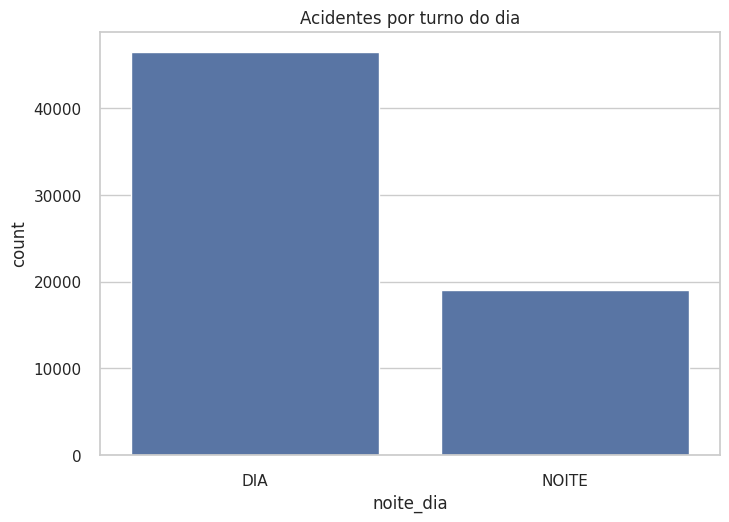

           feridos  fatais
noite_dia                 
DIA          18508     169
NOITE        11228     208


In [23]:
# Acidentes por turno (dia/noite)
sns.countplot(x="noite_dia", data=df_20_24)
plt.title("Acidentes por turno do dia")
plt.show()

# Severidade por turno
df_turno = df_20_24.groupby("noite_dia")[["feridos","fatais"]].sum()
print(df_turno)


6. Envolvidos

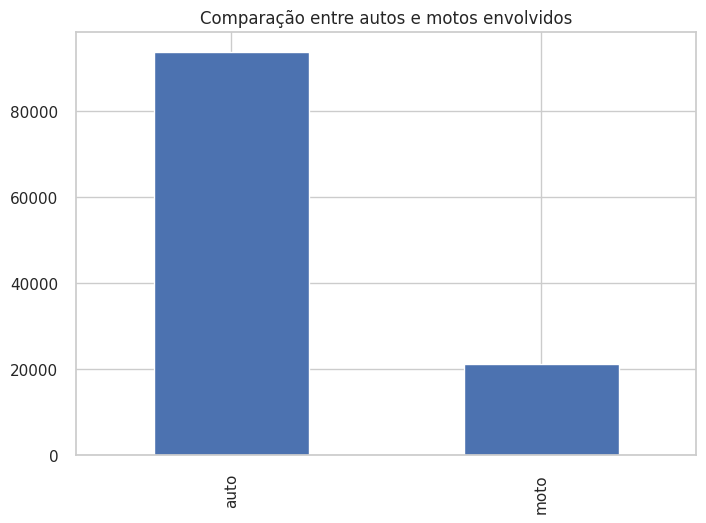

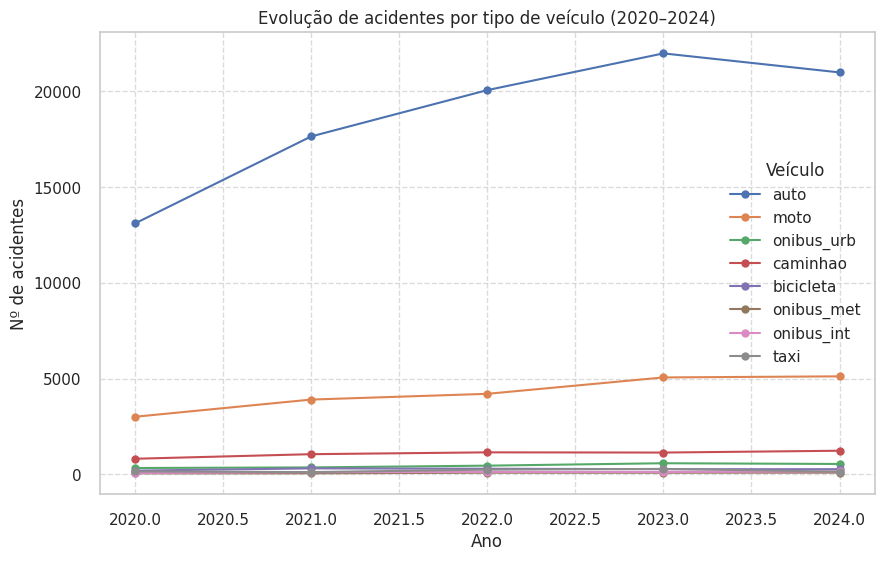

      veiculo  feridos_por_acidente
0   bicicleta                  0.98
1        moto                  0.90
2  onibus_met                  0.56
3  onibus_urb                  0.50
4  onibus_int                  0.41
5        auto                  0.40
6    caminhao                  0.17
7        taxi                  0.17


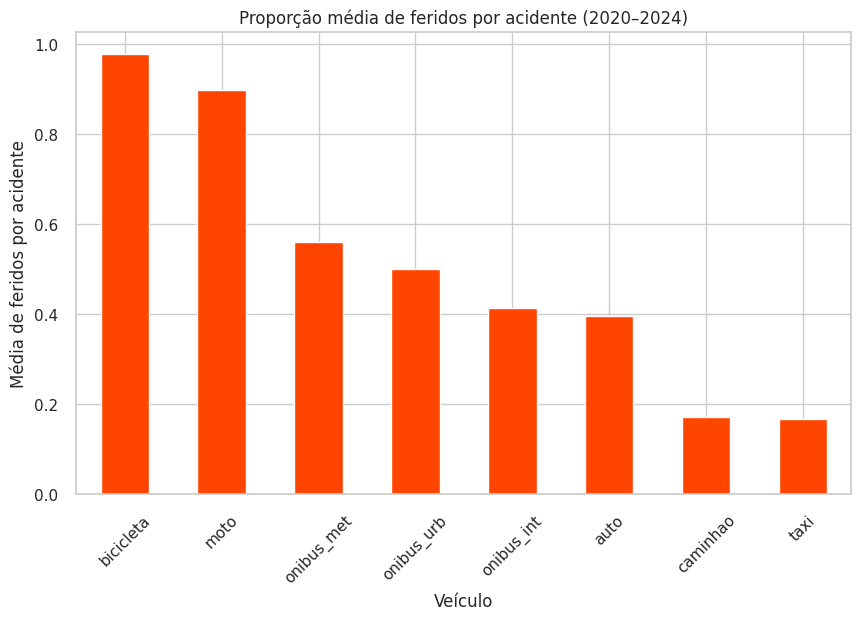

In [17]:
# Comparar proporção de acidentes com motos vs. automóveis
total_veic = df_20_24[["auto","moto"]].sum()
total_veic.plot(kind="bar")
plt.title("Comparação entre autos e motos envolvidos")
plt.show()

# Evolução temporal do envolvimento de bicicletas
evolucao_varios(df_20_24, cols_veiculos)

# Para cada veículo: soma feridos / soma acidentes em que ele aparece
proporcao_feridos = {}
for veic in cols_veiculos:
    total_acidentes = (df_20_24[veic] > 0).sum()
    total_feridos = df_20_24.loc[df_20_24[veic] > 0, "feridos"].sum()
    
    if total_acidentes > 0:
        proporcao_feridos[veic] = total_feridos / total_acidentes
    else:
        proporcao_feridos[veic] = 0

# Transforma em DataFrame
df_prop_feridos = (
    pd.Series(proporcao_feridos)
    .sort_values(ascending=False)
    .rename("feridos_por_acidente")
    .reset_index()
    .rename(columns={"index": "veiculo"})
)

print(df_prop_feridos)

# Plot
df_prop_feridos.plot(
    x="veiculo", y="feridos_por_acidente",
    kind="bar", figsize=(10,6), color="orangered", legend=False
)
plt.title("Proporção média de feridos por acidente (2020–2024)")
plt.xlabel("Veículo")
plt.ylabel("Média de feridos por acidente")
plt.xticks(rotation=45)
plt.show()